# RECRUITING SENIOR DATA ENGINEER - EDISON SPA
## Test di valutazione: data processing and coding skills

In questo test verrà richiesto lo sviluppo di una Proof of Concept per definire un flusso di elaborazione e analisi dei dati. Questo caso d'uso riguarda i consumi energetici di una smart home. In particolare, si avranno a disposizione due dataset:
* Smart Home (home-data-consumes-raw.csv): contiene tutti i dati dei consumi energetici di una casa nell'arco di una settimana.
* Dati climatici (climate-data.csv): contiene tutti i dati relativi al clima della stessa area geografica della smart home.

# Consigli di carattere generale

1. **Commentare il codice**, specialmente classi e funzioni utilizzando delle *docstrings*, aiuterà chiunque lavori in futuro a questo progetto a comprendere meglio il lavoro svolto
2. Quando vengono generate nuove features o variabili d'appoggio, dare **nomi concisi ma parlanti** permette una migliore comprensione del codice a chi si approcci per la prima volta al problema
3. Non esiste per forza un approccio giusto o sbagliato, potete aggiungere spiegazioni e **commenti** ad integrazioni delle vostre scelte
4. Non è richiesto lo sviluppo di modelli di deep learning ad elevata complessità o l'utilizzo di librerie esotiche, il test è mirato a stabilire alcune **competenze di base** che risultano utili nel lavoro in team e nello sviluppo di un codice production-ready.
5. Al fine di completare il test in un lasso di tempo breve, si consiglia di concentrare i propri sforzi sul testare poche soluzioni valide per una **PoC iniziale**, commentarle ed eventualmente giustificare eventuali semplificazioni introdotte

# Obiettivo e descrizione del problema

Il progetto ha lo scopo di analizzare i consumi di una smart home cercando di individuare le aree che consumano di più e ottimizzarne i consumi anche in relazione alle condizioni climatiche esterne alla casa. Per evitare di andare fuori contesto rispondere semplicemente alle seguenti domande:

1. Quali aree della casa consumano di più?
2. Con quale condizione atmosferica consumo di più? E con quale di meno?
3. Per quanti giorni abbiamo avuto una situazione chiara?
4. Qual è la media dei consumi per ogni area?
5. In media in quali giorni della settimana consumo di più? E quale area in particolare?
6. Per ogni giorno della settimana indicare quale area della casa consuma di più
7. Quale elettrodomestico della cucina consuma di più?
8. Quale dei due forni consuma di più?
9. Quanti kW vengono consumati quando la temperatura è massima? E quali sono i consumi con la temperatura minima?
10. Stessa domanda della 9 ma considerando la copertura di nuvole massimo e quella minima
11. stessa domanda di 9 e 10 ma considerando le precipitazioni massime e minime
12. In quale arco della giornata avviene la produzione massima di energia solare??
13. In quale arco della giornata si consuma di meno?
14. Quanta energia viene prodotta dai pannelli solari quando la temperatura esterna è massima?
15. Quanta energia viene prodotta dai pannelli solari con una copertura di nuvole massima?

Quanto possibile utilizzare grafici per rispondere alle domande
    


# Descrizione Dataset

**home-data-consumes-raw.csv:**
* **Time:** Timestamp della misurazione. E' in secondi, andrebbe trasformato in datetime
* **Gen:** Corrente generata
* **Dishwasher:** Corrente consumata dalla lavastoviglie, si può immaginare che sia in cucina
* **Furnace 1:** Corrente consumata da uno dei forni
* **Furnace 2:** Corrente consumata dal secondo forno
* **Wine Cellar:** Corrente consumata dalla cantina
* **Garage door:** Corrente consumata dalla porta del garage
* **Kitchen 12:** Corrente consumata da un elettrodomestico della cucina
* **Kitchen 14:** Corrente consumata da un elettrodomestico della cucina
* **Kitchen 38:** Corrente consumata da un elettrodomestico della cucina
* **Barn:** Corrente consumata dal fienile
* **Well:** Corrente consumata dal bagno
* **Mirowave:** Corrente consumata dal microonde (molto probabilmente sarà posizionato in cucina)
* **Living room:** Corrente consumata nel soggiorno
* **Solar:** Energia prodotta dai pannelli solari installati sulla casa

**climate-data.csv:**
* **Temperature:** Temperatura fuori dalla casa in gradi Celsius
* **Humidity:** Umidità dell'aria
* **Visibility:** Visibilità
* **Summary:** Variabile categorica che indica in generale com'è il tempo
* **Pressure:** pressione
* **Wind Speed:** velocità del vento penso in m/s
* **Cloud Cover:** Copertura del cielo dalle nuvole. Si misura in oktas, i valori spaziano da 0 a 1, 0 rappresenta assenza completa di nuove e 1 cielo coperto da nuvole
* **Precip Intensity:** Intensità delle precipitazioni (in mm)
* **PrecipProbability:** Probabilità di precipitazioni

# Fasi preprocessing
Questi sono dei suggerimenti su come procedere nelle prime fasi di analisi e processing del dataset. Tuttavia, si tratta di suggerimenti, non si è limitati solo a questi task.

1. Feature Engineering: 
        a. definire una nuova colonna che comprenda i consumi totali della cucina
        b. Ci sono due colonne che forniscono la stessa informazione, rimuoverne una
        c. Definire una nuova colonna che comprenda i consumi dei forni e del microonde
        d. Definire una nuova colonna categorica basata su Cloud Cover. Valori da (0, 0.30) => CIELO CHIARO, valori da (0.31, 0.60) => LEGGERMENTE COPERTO, valori (0.61, 1) => CIELO COPERTO
        e. calcolare la percentuale di energia generata sul totale consumato
2. Il tempo è nel formato timestamp, trasformarlo nel giusto formato YYYY-MM-DD HH:mm:SS
3. Controllare in generale che tutte le colonne siano nel loro giusto formato
4. Gestire i valori Null

# Inizio lavori

In [1]:
# Import delle librerie
# import...
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import os 

# 1. Pre-processing

Analizzare i dataset e trasformare le feauteres nel giusto formato.

In [42]:
# lettura dati
# ...
CLIMATE_DATA_PATH = 'data/climate-data.csv'
SMART_HOME_PATH = 'data/smart-home-data-raw.csv'

# Creazione del DataFrame di climate-data definendo lo schema
schema_climate = {'id': 'int', 'time': 'str', 'temperature': 'float', 'humidity': 'float', 'visibility': 'float', 'summary': 'str',
         'pressure': 'float', 'windSpeed': 'float', 'cloudCover': 'float', 'precipIntensity': 'float', 'precipProbability': 'float'} 

climate_df = pd.read_csv(CLIMATE_DATA_PATH, dtype=schema_climate)


# Creazione del DataFrame di smart-home definendo lo schema
schema_smart_home = {'id': 'int', 'time': 'str', 'gen [kW]': 'float', 'Dishwasher [kW]': 'float', 'Furnace 1 [kW]': 'float', 'Furnace 2 [kW]': 'float',
         'Home office [kW]': 'float', 'Fridge [kW]': 'float', 'Wine cellar [kW]': 'float', 'Garage door [kW]': 'float', 'Kitchen 12 [kW]': 'float',
         'Kitchen 14 [kW]': 'float',  'Kitchen 38 [kW]': 'float', 'Barn [kW]': 'float','Well [kW]': 'float','Microwave [kW]': 'float','Living room [kW]': 'float',
         'Solar [kW]': 'float', 'alexa [kW]': 'float'} 

smart_home_df = pd.read_csv(SMART_HOME_PATH, dtype=schema_smart_home)


### 1.2 Trasformazione dei dati nel loro giusto formato

### 1.1 EDA

Effettuare delle prime visualizzazioni sui dati per comprendere se sono nel giusto formato, visualizzare il loro comportamento e la presenza di valori **NULL**. Non bisogna farlo per tutte le variabili bastano solo le variabili su cui si effettueranno le dovute trasformaizoni.

In [3]:
#Per effettuare una prima visualizzazione dei dati, andrò a mostrare le prime righe dei DataFrame importati al punto precedente:
#Per il file csv climate-data
print(climate_df.head())

#Per il file csv smart-home-data-raw: 
print(smart_home_df.head())

   id        time  temperature  humidity  visibility summary  pressure  \
0   0  1451624400       97.052      0.62        10.0   Clear   1016.91   
1   1  1451624401       97.052      0.62        10.0   Clear   1016.91   
2   2  1451624402       97.052      0.62        10.0   Clear   1016.91   
3   3  1451624403       97.052      0.62        10.0   Clear   1016.91   
4   4  1451624404       97.052      0.62        10.0   Clear   1016.91   

   windSpeed  cloudCover  precipIntensity  precipProbability  
0       9.18         0.0              0.0                0.0  
1       9.18         0.0              0.0                0.0  
2       9.18         0.0              0.0                0.0  
3       9.18         0.0              0.0                0.0  
4       9.18         0.0              0.0                0.0  
   id        time  gen [kW]  Dishwasher [kW]  Furnace 1 [kW]  Furnace 2 [kW]  \
0   0  1451624400  0.003483         0.000033        0.020700        0.061917   
1   1  1451624401

In [72]:
#Verifico la presenza di valori Null per ogni colonna all'interno dei Dataframe: 
print("visualizzazione dei valori null per il DF: climate_df")
print(climate_df.isnull().sum())
print("visualizzazione dei valori null per il DF: smart_home_df")
print(smart_home_df.isnull().sum())

visualizzazione dei valori null per il DF: climate_df
id                   0
time                 0
temperature          0
humidity             0
visibility           0
summary              0
pressure             0
windSpeed            0
cloudCover           0
precipIntensity      0
precipProbability    0
dtype: int64
visualizzazione dei valori null per il DF: smart_home_df
id                       0
time                     0
gen [kW]                 1
Dishwasher [kW]          1
Furnace 1 [kW]           1
Furnace 2 [kW]           1
Home office [kW]         1
Fridge [kW]              1
Wine cellar [kW]         1
Garage door [kW]         1
Kitchen 12 [kW]          1
Kitchen 14 [kW]          1
Kitchen 38 [kW]          1
Barn [kW]                1
Well [kW]                1
Microwave [kW]           1
Living room [kW]         1
Solar [kW]               1
alexa [kW]          432167
dtype: int64


Nella cella sotto si crea un DataFrame contenente le sole colonne di interesse che definiscono i consumi della zona cucina. 



In [5]:
#Seleziono le colonne di interesse che definiscono i consumi della zona cucina: 
columns_of_interest = ['Dishwasher [kW]', 'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Fridge [kW]', 'Kitchen 12 [kW]', 'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Microwave [kW]']

cucina_df = smart_home_df[columns_of_interest]
print(cucina_df.head())

   Dishwasher [kW]  Furnace 1 [kW]  Furnace 2 [kW]  Fridge [kW]  \
0         0.000033        0.020700        0.061917     0.124150   
1         0.000000        0.020717        0.063817     0.124000   
2         0.000017        0.020700        0.062317     0.123533   
3         0.000017        0.106900        0.068517     0.123133   
4         0.000133        0.236933        0.063983     0.122850   

   Kitchen 12 [kW]  Kitchen 14 [kW]  Kitchen 38 [kW]  Microwave [kW]  
0         0.000417         0.000150         0.000000        0.004067  
1         0.000417         0.000150         0.000000        0.004067  
2         0.000433         0.000167         0.000017        0.004067  
3         0.000433         0.000217         0.000000        0.004067  
4         0.000450         0.000333         0.000000        0.004067  


Per analizzare il comportamento dei dati: si creano degli instogramma per le varie colonne sui vari Dataset: 
1. per tutti i consumi della cucina. 
2. sull'energia generata.
3. sull'energia solare prodotta. 
4. sulla temperatura fuori dalla casa. 

<Axes: ylabel='Frequency'>

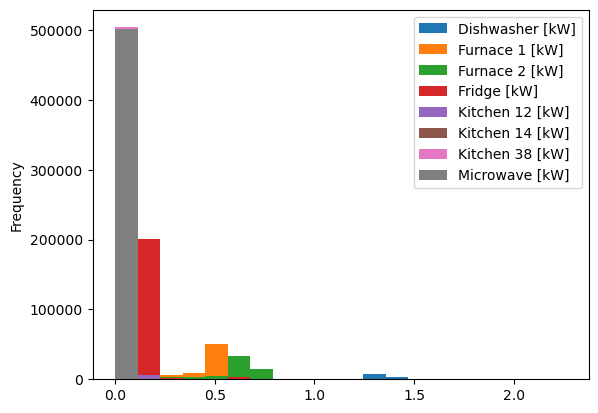

In [6]:
#1. Instogrammi per i consumi della cucina: 
cucina_df.plot(kind='hist', bins=20)

<Axes: ylabel='Frequency'>

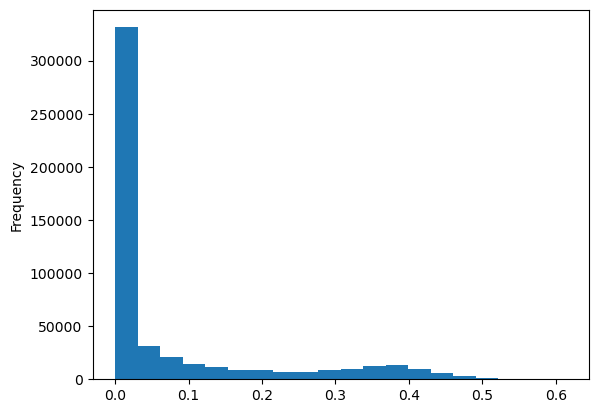

In [7]:
#2. Instogramma sull'energia generata: 
smart_home_df['gen [kW]'].plot(kind='hist', bins=20)

<Axes: ylabel='Frequency'>

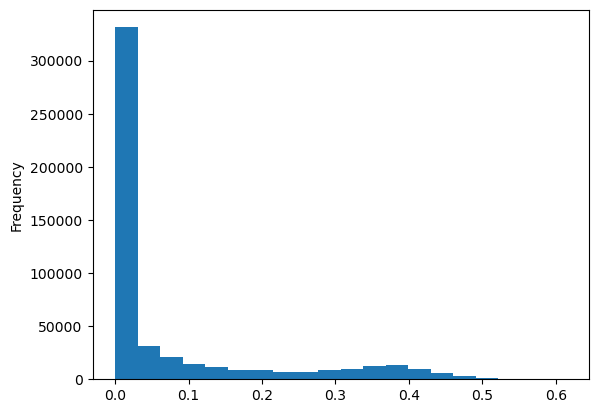

In [8]:
#3. Instogramma sull'energia prodotta dai panelli solari: 
smart_home_df['Solar [kW]'].plot(kind='hist', bins=20)

<Axes: ylabel='Frequency'>

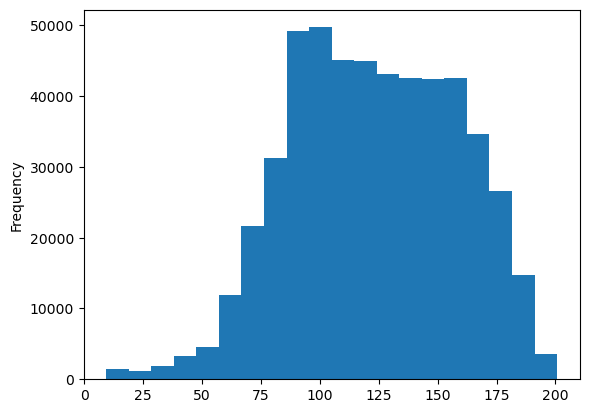

In [9]:
#4. Istagramma sulla temperatura fuori dalla casa: 
climate_df['temperature'].plot(kind='hist', bins=20)

### 1.3 Feature Engineering

Questi sono dei suggerimenti su come procedere nelle prime fasi di feature engineering. Tuttavia, si tratta di suggerimenti, non si è limitati solo a questi task.

1. Feature Engineering: 
        a. definire una nuova colonna che comprenda i consumi totali della cucina
        b. Ci sono due colonne che forniscono la stessa informazione, rimuoverne una
        c. Definire una nuova colonna che comprenda i consumi dei forni e del microonde
        d. Definire una nuova colonna categorica basata su Cloud Cover. Valori da (0, 0.30) => CIELO CHIARO, valori da (0.31, 0.60) => LEGGERMENTE COPERTO, valori (0.61, 1) => CIELO COPERTO
        e. calcolare la percentuale di energia generata sul totale consumato
2. Il tempo è nel formato timestamp, trasformarlo nel giusto formato YYYY-MM-DD HH:mm:SS
3. Gestire i valori Null

In [10]:
#a. definire una nuova colonna che comprenda i consumi totali della cucina
#Definisco il DF
column_interest_smart_home = ['id', 'time', 'gen [kW]', 'Home office [kW]', 'Wine cellar [kW]', 'Garage door [kW]', 'Barn [kW]',
                             'Well [kW]', 'Living room [kW]', 'Solar [kW]', 'alexa [kW]']

df_smart_home_cucina = smart_home_df[column_interest_smart_home]

#somma dei consumi totali della cucina: 
sum_consumi_cucina = cucina_df.sum(axis = 1, skipna = True)
df_consumi_cucina = pd.DataFrame(sum_consumi_cucina)

#estrare i valori della seconda colonna
values_cucina = df_consumi_cucina.iloc[:, 0]

#Si crea la colonna 'cucina' nel DF
df_smart_home_cucina = df_smart_home_cucina.assign(cucina=values_cucina)

print(df_smart_home_cucina.head())

   id        time  gen [kW]  Home office [kW]  Wine cellar [kW]  \
0   0  1451624400  0.003483          0.442633          0.006983   
1   1  1451624401  0.003467          0.444067          0.006983   
2   2  1451624402  0.003467          0.446067          0.006983   
3   3  1451624403  0.003483          0.446583          0.006983   
4   4  1451624404  0.003467          0.446533          0.006850   

   Garage door [kW]  Barn [kW]  Well [kW]  Living room [kW]  Solar [kW]  \
0          0.013083   0.031350   0.001017          0.001517    0.003483   
1          0.013117   0.031500   0.001017          0.001650    0.003467   
2          0.013083   0.031517   0.001000          0.001650    0.003467   
3          0.013000   0.031500   0.001017          0.001617    0.003483   
4          0.012783   0.031500   0.001017          0.001583    0.003467   

   alexa [kW]    cucina  
0         NaN  0.211433  
1         NaN  0.213167  
2         NaN  0.211250  
3         NaN  0.303283  
4         NaN  0

In [11]:
#b. Ci sono due colonne che forniscono la stessa informazione, rimuoverne una

#metodo che individua se ci sono dei duplicati nei DF
def getDuplicateColumns(df):
 
    #Creazione di un Set
    lista_colonne_duplicati = set()
 
    #Iterare sulle colonne del DF  
    for x in range(df.shape[1]):
 
        #Prende la colonna alla posizione x-esima
        col = df.iloc[:, x]
 
        #Iterare sulle colonne del DF dalla posizione x+1 fino alla fine
        for y in range(x + 1, df.shape[1]):
 
            #Prende la colonna alla posizione y-esima
            otherCol = df.iloc[:, y]
 
            #Check se le colonne x e y sono uguali
            if col.equals(otherCol):
                lista_colonne_duplicati.add(df.columns.values[y])
 
    #Return della lista delle colonne duplicate
    return list(lista_colonne_duplicati)


print("Duplicati nel DF: climate_df")
duplicateColNames_climate = getDuplicateColumns(climate_df)

if(len(duplicateColNames_climate)==0): 
    print("Non ci sono duplicati nel df: climate_df")
else:
    for column in duplicateColNames_climate:
        print('Column Name : ', column)
    
print("Duplicati nel DF: smart_home_df")
duplicateColNames_smart_home = getDuplicateColumns(smart_home_df)

if(len(duplicateColNames_smart_home)==0):
    print("Non ci sono duplicati nel df: smart_home_df")
else: 
    for column in duplicateColNames_smart_home:
        print('Column Name : ', column)


Duplicati nel DF: climate_df
Non ci sono duplicati nel df: climate_df
Duplicati nel DF: smart_home_df
Column Name :  Solar [kW]


In [18]:
#Eliminare la colonna Solar che è duplicata
df_smart_home_cucina = df_smart_home_cucina.drop(['Solar [kW]'], axis = 1)
print(df_smart_home_cucina.head())

   id        time  gen [kW]  Home office [kW]  Wine cellar [kW]  \
0   0  1451624400  0.003483          0.442633          0.006983   
1   1  1451624401  0.003467          0.444067          0.006983   
2   2  1451624402  0.003467          0.446067          0.006983   
3   3  1451624403  0.003483          0.446583          0.006983   
4   4  1451624404  0.003467          0.446533          0.006850   

   Garage door [kW]  Barn [kW]  Well [kW]  Living room [kW]  alexa [kW]  \
0          0.013083   0.031350   0.001017          0.001517         NaN   
1          0.013117   0.031500   0.001017          0.001650         NaN   
2          0.013083   0.031517   0.001000          0.001650         NaN   
3          0.013000   0.031500   0.001017          0.001617         NaN   
4          0.012783   0.031500   0.001017          0.001583         NaN   

     cucina  forno_micro         cielo  
0  0.211433     0.086683  CIELO CHIARO  
1  0.213167     0.088600  CIELO CHIARO  
2  0.211250     0.08708

In [19]:
#c. Definire una nuova colonna che comprenda i consumi dei forni e del microonde 
column_forno_micro = ['Furnace 1 [kW]', 'Furnace 2 [kW]','Microwave [kW]']

df_forno_micro = smart_home_df[column_forno_micro]

sum_forno_micro = df_forno_micro.sum(axis = 1, skipna = True)


df_smart_home_cucina = df_smart_home_cucina.assign(forno_micro=sum_forno_micro)

print(df_smart_home_cucina)

            id        time  gen [kW]  Home office [kW]  Wine cellar [kW]  \
0            0  1451624400  0.003483          0.442633          0.006983   
1            1  1451624401  0.003467          0.444067          0.006983   
2            2  1451624402  0.003467          0.446067          0.006983   
3            3  1451624403  0.003483          0.446583          0.006983   
4            4  1451624404  0.003467          0.446533          0.006850   
...        ...         ...       ...               ...               ...   
503906  503906  1452128306  0.003233          0.041750          0.008433   
503907  503907  1452128307  0.003217          0.042033          0.008467   
503908  503908  1452128308  0.003217          0.042100          0.008233   
503909  503909  1452128309  0.003233          0.042100          0.008133   
503910  503910           \       NaN               NaN               NaN   

        Garage door [kW]  Barn [kW]  Well [kW]  Living room [kW]  alexa [kW]  \
0      

In [21]:
#d. Definire una nuova colonna categorica basata su Cloud Cover. Valori da (0, 0.30) => CIELO CHIARO, 
#valori da (0.31, 0.60) => LEGGERMENTE COPERTO, valori (0.61, 1) => CIELO COPERTO

def categorizza_cloud_cover(valore):
    if 0 <= valore <= 0.30:
        return 'CIELO CHIARO'
    elif 0.31 <= valore <= 0.60:
        return 'LEGGIAMENTE COPERTO'
    elif 0.61 <= valore <= 1:
        return 'CIELO COPERTO'
    else:
        return 'Valore non valido'
    
cielo = climate_df['cloudCover'].apply(categorizza_cloud_cover)

df_smart_home_cucina = df_smart_home_cucina.assign(cielo=cielo)

print(df_smart_home_cucina)

            id        time  gen [kW]  Home office [kW]  Wine cellar [kW]  \
0            0  1451624400  0.003483          0.442633          0.006983   
1            1  1451624401  0.003467          0.444067          0.006983   
2            2  1451624402  0.003467          0.446067          0.006983   
3            3  1451624403  0.003483          0.446583          0.006983   
4            4  1451624404  0.003467          0.446533          0.006850   
...        ...         ...       ...               ...               ...   
503906  503906  1452128306  0.003233          0.041750          0.008433   
503907  503907  1452128307  0.003217          0.042033          0.008467   
503908  503908  1452128308  0.003217          0.042100          0.008233   
503909  503909  1452128309  0.003233          0.042100          0.008133   
503910  503910           \       NaN               NaN               NaN   

        Garage door [kW]  Barn [kW]  Well [kW]  Living room [kW]  alexa [kW]  \
0      

In [26]:
#e. calcolare la percentuale di energia generata sul totale consumato

column_interest_consumi = ['Home office [kW]', 'Wine cellar [kW]', 'Garage door [kW]', 'Barn [kW]',
                             'Well [kW]', 'Living room [kW]', 'alexa [kW]', 'cucina']

df_smart_home_consumi_tot = df_smart_home_cucina[column_interest_consumi]

sum_consumi_tot = df_smart_home_consumi_tot.sum(axis = 1, skipna = True)

percentuale = (sum_consumi_tot / df_smart_home_cucina['gen [kW]'].sum()) * 100
#percentuale = (df_smart_home_cucina['gen [kW]'] / sum_consumi_tot.sum()) * 100 

print(percentuale)

0         0.001843
1         0.001852
2         0.001852
3         0.002093
4         0.002419
            ...   
503906    0.002177
503907    0.003039
503908    0.004149
503909    0.003216
503910    0.000000
Length: 503911, dtype: float64


In [69]:
#2. Il tempo è nel formato timestamp, trasformarlo nel giusto formato YYYY-MM-DD HH:mm:SS

#Per il DataFrame df_smart_home_cucina 

time = df_smart_home_cucina['time']

# Converti i timestamp in datetime
#df_1["time"] = pd.to_datetime(df_smart_home_cucina["time"])
df_1["time"] = pd.to_datetime(time)


# Formatta il datetime nel formato desiderato
df_1["time"] = df_1["time"].dt.strftime("%Y-%m-%d %H:%M:%S")

print(df)
#df['tempo'] = pd.to_datetime(df_smart_home_cucina['time'],format= '%H:%M:%S' ).dt.time

C:\Users\angelo\AppData\Local\Temp\ipykernel_10868\2407091534.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_1["time"] = pd.to_datetime(time)


DateParseError: year 1451624402 is out of range: 1451624402, at position 0

In [84]:
#2. Il tempo è nel formato timestamp, trasformarlo nel giusto formato YYYY-MM-DD HH:mm:SS

#Per il DataFrame climate_df 
time = climate_df['time']

# Converti i timestamp in datetime
#df_1["time"] = pd.to_datetime(df_smart_home_cucina["time"])
df_climate["time"] = pd.to_datetime(time)


# Formatta il datetime nel formato desiderato
df_climate["time"] = df_climate["time"].dt.strftime("%Y-%m-%d %H:%M:%S")

print(df_climate)
#df['tempo'] = pd.to_datetime(df_smart_home_cucina['time'],format= '%H:%M:%S' ).dt.time

C:\Users\angelo\AppData\Local\Temp\ipykernel_10868\1517122295.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_climate["time"] = pd.to_datetime(time)


DateParseError: year 1451624400 is out of range: 1451624400, at position 0

Gestire i valori Null

Per la gestione dei valori Null, dall'analisi fatta sopra, si è visto che la colonna Alexa è piena di valori Null, ovvero ha bel 432167 righe a Null, oltre ciò, dall'analisi svolta sulle query che bisogna al punto 2 sotto, la colonna Alexa non impatta molto. Quindi fatte queste considerazioni si è deciso di eliminare la colonna Alexa.


In [80]:
#3. Gestire i valori Null

#Eliminazione della colonna Alexa: 
df_smart_home_cucina = df_smart_home_cucina.drop(['alexa [kW]'], axis = 1)
print(df_smart_home_cucina.head())


KeyError: "['alexa [kW]'] not found in axis"

Eliminazione delle righe con il valore null: 
Le colonne: gen [kW], Home office [kW], Wine cellar [kW], Garage door [kW], Barn [kW], Well [kW] e Living room [kW] hanno 1 sola riga a Null e queste vengono eliminate 

In [83]:
#Eliminazione delle righe con il valore null: 

df_smart_home_cucina = df_smart_home_cucina.dropna(how='any')
print(df_smart_home_cucina.isnull().sum())


id                  0
time                0
gen [kW]            0
Home office [kW]    0
Wine cellar [kW]    0
Garage door [kW]    0
Barn [kW]           0
Well [kW]           0
Living room [kW]    0
cucina              0
forno_micro         0
cielo               0
dtype: int64


### 1.4 Data Integration

Integrare i dati della smart home con quelli del clima

In [87]:
#Possibili sol.:Posso fare la merge dei 2 dataframe sull'id, oppure sulla data: time; oppure fare la concatenazione dei 2 DF 

#Fatta la merge dei 2 DF sulla colonna time
df_integrato = df_smart_home_cucina.merge(climate_df, on="time")
print(df_integrato)


          id_x        time  gen [kW]  Home office [kW]  Wine cellar [kW]  \
0            0  1451624400  0.003483          0.442633          0.006983   
1            1  1451624401  0.003467          0.444067          0.006983   
2            2  1451624402  0.003467          0.446067          0.006983   
3            3  1451624403  0.003483          0.446583          0.006983   
4            4  1451624404  0.003467          0.446533          0.006850   
...        ...         ...       ...               ...               ...   
503905  503905  1452128305  0.003183          0.041783          0.008667   
503906  503906  1452128306  0.003233          0.041750          0.008433   
503907  503907  1452128307  0.003217          0.042033          0.008467   
503908  503908  1452128308  0.003217          0.042100          0.008233   
503909  503909  1452128309  0.003233          0.042100          0.008133   

        Garage door [kW]  Barn [kW]  Well [kW]  Living room [kW]    cucina  \
0        

# 2. Rispondere alle domande obiettivo

### 1. Quali aree della casa consumano di più?


In [90]:
print(df_smart_home_cucina.head())
#creare un Df con le colonne di interesse, fare il confronto tra le 7 colonne con la groupby, poi fare anche un grafico 

#Modificare: 
# Calcola il consumo totale per area
df_consumi = df_consumi.groupby("area")["consumo"].sum()

# Ordina il DataFrame per consumo decrescente
df_consumi = df_consumi.sort_values(ascending=False)

print(df_consumi)


   id        time  gen [kW]  Home office [kW]  Wine cellar [kW]  \
0   0  1451624400  0.003483          0.442633          0.006983   
1   1  1451624401  0.003467          0.444067          0.006983   
2   2  1451624402  0.003467          0.446067          0.006983   
3   3  1451624403  0.003483          0.446583          0.006983   
4   4  1451624404  0.003467          0.446533          0.006850   

   Garage door [kW]  Barn [kW]  Well [kW]  Living room [kW]    cucina  \
0          0.013083   0.031350   0.001017          0.001517  0.211433   
1          0.013117   0.031500   0.001017          0.001650  0.213167   
2          0.013083   0.031517   0.001000          0.001650  0.211250   
3          0.013000   0.031500   0.001017          0.001617  0.303283   
4          0.012783   0.031500   0.001017          0.001583  0.428750   

   forno_micro         cielo  
0     0.086683  CIELO CHIARO  
1     0.088600  CIELO CHIARO  
2     0.087083  CIELO CHIARO  
3     0.179483  CIELO CHIARO  
4  

### 2. Con quale condizione atmosferica consumo di più? E con quale di meno?


### 3. Per quanti giorni abbiamo avuto una situazione chiara?


### 4. Qual'è la media dei consumi per ogni area?


### 5. In media in quali giorni della settimana consumo di più? E quale area in particolare?


### 6. Per ogni giorno della settimana indicare quale area della casa consuma di più


### 7. Quale elettrodomestico della cucina consuma di più?


### 8. Quale dei due forni consuma di più?


### 9. Quanti kW vengono consumati quando la temperatura è massima? E quali sono i consumi con la temperatura minima?


### 10. Stessa domanda della 9 ma considerando la copertura di nuvole massimo e quella minima


### 11. stessa domanda di 9 e 10 ma considerando le precipitazioni massime e minime


### 12. In quale arco della giornata avviene la produzione massima di energia solare??


### 13. In quale arco della giornata si consuma di meno?


### 14. Quanta energia viene prodotta dai pannelli solari quando la temperatura esterna è massima?


### 15. Quanta energia viene prodotta dai pannelli solari con una copertura di nuvole massima?

# Object Oriented Programming

* Creare una classe python che permetta di effettuare le operazioni di feature engineering e data integration nei punti 1.3 e 1.2
* Creare una classe python che incapsuli all'interno di metodi il codice utilizzato per rispondere alle domande del punto 2 (Escluso il codice per effettuare i grafici)

**N.B:** Oltre alla definizione delle classe dovrete indicare in una cella la lista di comandi da eseguire per rispondere alle domande del punto 2

# 3. Versioning

Elencate nella cella sottostante i comandi necessari per:
1. Creare in una cartella vuota un nuovo repository git

Immaginate di copia-incollare il notebook ultimato nella cartella in questione

2. Eseguire il primo commit
4. Indicare che il repository ipotetico https://github.com/myuser/myrepo.git è il repository remoto che vogliamo sincronizzare d'ora in avanti con le modifiche che effttueremo in locale
5. sincronizzare le modifiche eseguite in locale con il repository remoto

# 4. Save

Inviare ai referenti del recruiting Edison il seguente materiale:
1. Questo notebook, con tutti gli output delle varie celle visibili, in **formato HTML**
2. Questo notebook, in **formato .ipynb**, salvato dopo avere eseguito "Clear Output"

L'esaminatore dovrebbe essere in grado di eseguire tutte le celle del notebook avendo a disposizione i due file CSV forniti all'inizio della prova e avendo ricreato l'environment da voi indicato.